In [1]:
# Imports
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns

# Load and preprocessing Dataset

In [2]:
# Load dataset
data = load_iris()
X = data.data
Y = data.target

# Type of data
print('Type of data:', type(X[0]))

# length of data
print(f'length of X: {len(X)} | length of Y: {len(Y)}')

# Number of unique classes in dataset
print('number of unique classes in dataset:', np.unique(Y))

# Do we have balanced dataset
print(f'Number of samples per class:{np.bincount(Y)}')

Type of data: <class 'numpy.ndarray'>
length of X: 150 | length of Y: 150
number of unique classes in dataset: [0 1 2]
Number of samples per class:[50 50 50]


In [3]:
# Normalization check
print(f'Mean: {X.mean(axis=0)} | Std: {X.std(axis=0)}')

# Normalize the features
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

print('Normalized data')
print(f'Mean: {X.mean(axis=0)} | Std: {X.std(axis=0)}')

Mean: [5.84333333 3.05733333 3.758      1.19933333] | Std: [0.82530129 0.43441097 1.75940407 0.75969263]
Normalized data
Mean: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15] | Std: [1. 1. 1. 1.]


In [4]:
# split the data
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size= 0.2, random_state=43, shuffle=True)

print(f'Training samples (X): {train_x.shape}')
print(f'Training targets (Y): {train_y.shape}')
print(f'Testing samples (X): {test_x.shape}')
print(f'Testing targets (Y): {test_y.shape}')

Training samples (X): (120, 4)
Training targets (Y): (120,)
Testing samples (X): (30, 4)
Testing targets (Y): (30,)


In [5]:
# To float 32
'''
for memory efficency and ML framework matching/preferences we convert features into float32
'''

train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

# Dataset, DataLoader and Model

In [6]:
# Dataset and DataLoader
from dataset import IrisDataset

dataset = IrisDataset(train_x, train_y)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

In [7]:
# Model
from model import IrisClassification

# inputs
num_features = X.shape[1]
num_hiddenstate = 6 # Hyper parameter
num_classes = len(np.unique(Y))

# Instatiate the model
Iris_classifier = IrisClassification(num_features=num_features, num_hiddenstate=num_hiddenstate, num_classes=num_classes)

# Training

In [8]:
# Loss
loss_function = nn.CrossEntropyLoss()

# Optimizer
LR = 0.01
optimizer = torch.optim.SGD(Iris_classifier.parameters(), lr=LR)

In [9]:
# training loop
training_loss = []
EPOCHS = 100

for epoch in range(EPOCHS):
    for batch_num, (X,Y) in enumerate(dataloader):

        # initialize weights
        optimizer.zero_grad()
        
        # Predictions
        Y_predictions = Iris_classifier(X)

        # Calculate loss
        loss = loss_function(Y_predictions, Y)

        # Backpropogation
        loss.backward()

        # optimize the weights
        optimizer.step()

    # print loss
    loss_float = float(loss.data.detach().numpy())
    training_loss.append(loss_float)
    print(f'Epoch:{epoch} | loss: {loss_float}')


Epoch:0 | loss: 1.1987367868423462
Epoch:1 | loss: 1.1013827323913574
Epoch:2 | loss: 1.0966010093688965
Epoch:3 | loss: 1.0724060535430908
Epoch:4 | loss: 1.157611608505249
Epoch:5 | loss: 1.1104339361190796
Epoch:6 | loss: 1.0784707069396973
Epoch:7 | loss: 1.0764579772949219
Epoch:8 | loss: 1.0518591403961182
Epoch:9 | loss: 1.0801633596420288
Epoch:10 | loss: 1.0535657405853271
Epoch:11 | loss: 1.0672330856323242
Epoch:12 | loss: 1.0265061855316162
Epoch:13 | loss: 1.0188666582107544
Epoch:14 | loss: 1.0018595457077026
Epoch:15 | loss: 0.9949086904525757
Epoch:16 | loss: 0.998438835144043
Epoch:17 | loss: 0.9694764614105225
Epoch:18 | loss: 0.973240852355957
Epoch:19 | loss: 0.9825547337532043
Epoch:20 | loss: 0.9143933057785034
Epoch:21 | loss: 0.9640114307403564
Epoch:22 | loss: 0.9303715229034424
Epoch:23 | loss: 0.9065523147583008
Epoch:24 | loss: 0.9417746067047119
Epoch:25 | loss: 0.808904767036438
Epoch:26 | loss: 0.8689444065093994
Epoch:27 | loss: 0.9031546115875244
Epoch:

<Axes: >

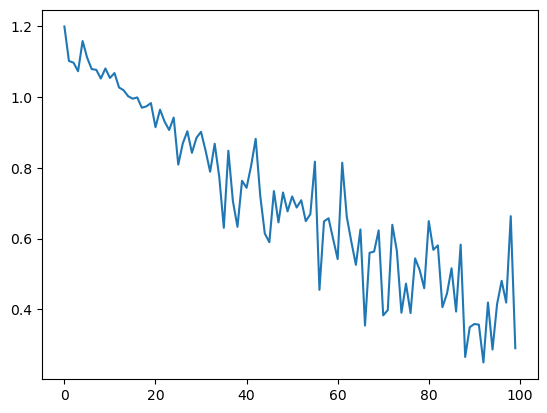

In [10]:
# training loss graph
sns.lineplot(x=range(EPOCHS), y=training_loss)

# Evaluation

In [14]:
# Evaluation using accuracy score
with torch.no_grad():
    Y_log_predictions = Iris_classifier(test_x)

    Y_predictions = torch.max(Y_log_predictions, 1)

accuracy_score(test_y, Y_predictions.indices)


0.9333333333333333